          prediction date  total_power
0     2018-01-01 00:00:00     11445.28
1     2018-01-01 01:00:00     12877.70
2     2018-01-01 02:00:00     13803.53
3     2018-01-01 03:00:00     14623.54
4     2018-01-01 04:00:00     15325.17
...                   ...          ...
8755  2018-12-31 19:00:00         0.00
8756  2018-12-31 20:00:00         0.00
8757  2018-12-31 21:00:00         0.00
8758  2018-12-31 22:00:00       120.49
8759  2018-12-31 23:00:00        83.22

[8760 rows x 2 columns]
           prediction date  total_power
0      2016-01-01 00:00:00      4126.70
1      2016-01-01 01:00:00      5688.51
2      2016-01-01 02:00:00      7742.01
3      2016-01-01 03:00:00      7660.50
4      2016-01-01 04:00:00      9730.48
...                    ...          ...
26299  2018-12-31 19:00:00         0.00
26300  2018-12-31 20:00:00         0.00
26301  2018-12-31 21:00:00         0.00
26302  2018-12-31 22:00:00       120.49
26303  2018-12-31 23:00:00        83.22

[26304 rows x 2 columns]


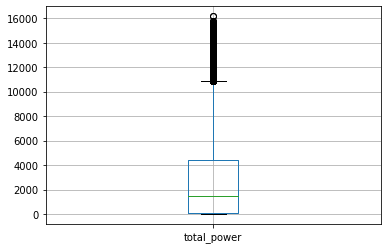

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

Y_test_with_date = pd.read_csv('graficos/Y_test.csv')
print(Y_test_with_date)
Y_test = pd.DataFrame(Y_test_with_date['total_power'])
Y_test.columns=['total_power']

target_with_date = pd.read_csv('graficos/target.csv')
print(target_with_date)
target = pd.DataFrame(target_with_date['total_power'])
target.columns=['total_power']

plot = target.boxplot()
fig = plot.get_figure()
fig.savefig("graficos/target.png", facecolor='white', edgecolor='white')

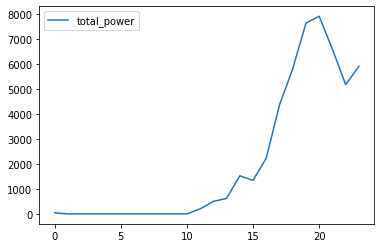

In [34]:
date = "2018-03-26"
data = Y_test_with_date.loc[Y_test_with_date['prediction date'].str.contains(date)]
data = pd.DataFrame(data['total_power'])
#print(data)
data.reset_index(drop=True, inplace=True)
plot = data.plot()
fig = plot.get_figure()
fig.savefig("graficos/Y_test_" + date + ".png", facecolor='white', edgecolor='white')


In [77]:
ridge_Y_test_predict = pd.DataFrame(pd.read_csv('graficos/ridge_Y_test_predict.csv'))

ridge_Y_test_predict.columns = ['total_power']

print(ridge_Y_test_predict)
print(Y_test)

print(mean_absolute_error(Y_test, ridge_Y_test_predict)/17560)

ridge_error = pd.DataFrame(abs(Y_test - ridge_Y_test_predict))
ridge_error.columns = ['ridge_absolute_error']
print(ridge_error['ridge_absolute_error'].argmax())
print("Fecha del peor día de ridge: ")
print(Y_test_with_date.loc[2238])
#print(ridge_abs_err)
#sum(ridge_abs_err)/len(ridge_abs_err)

       total_power
0      7813.141948
1      8756.706061
2      9651.939890
3     10493.949251
4     11075.725013
...            ...
8755  -1037.431764
8756   -876.279778
8757   -935.910222
8758   -564.332201
8759     37.877392

[8760 rows x 1 columns]
      total_power
0        11445.28
1        12877.70
2        13803.53
3        14623.54
4        15325.17
...           ...
8755         0.00
8756         0.00
8757         0.00
8758       120.49
8759        83.22

[8760 rows x 1 columns]
0.08660358898676064
1667
Fecha del peor día de ridge: 
prediction date    2018-04-04 06:00:00
total_power                          0
Name: 2238, dtype: object


In [78]:
indices = Y_test_with_date.index[Y_test_with_date['prediction date'].str.contains(date)].tolist()
#Y_test_with_date.loc[indices]

In [79]:
mlp_Y_test_predict = pd.DataFrame(pd.read_csv('graficos/mlp_Y_test_predict.csv'))

mlp_Y_test_predict.columns = ['total_power']

print(mlp_Y_test_predict)
print(Y_test)

print(mean_absolute_error(Y_test, mlp_Y_test_predict)/17560)

mlp_error = pd.DataFrame(abs(Y_test - mlp_Y_test_predict))
mlp_error.columns = ['mlp_absolute_error']
print(mlp_error['mlp_absolute_error'].argmax())
print("Fecha del peor día de mlp: ")
print(Y_test_with_date.loc[2238])
#print(mlp_abs_err)
#sum(mlp_abs_err)/len(mlp_abs_err)

       total_power
0      9764.144754
1     10855.194621
2     12117.068150
3     12443.446632
4     12533.153805
...            ...
8755    -47.108090
8756     16.049790
8757     39.502857
8758    108.325328
8759    300.611833

[8760 rows x 1 columns]
      total_power
0        11445.28
1        12877.70
2        13803.53
3        14623.54
4        15325.17
...           ...
8755         0.00
8756         0.00
8757         0.00
8758       120.49
8759        83.22

[8760 rows x 1 columns]
0.0661614823881312
2238
Fecha del peor día de mlp: 
prediction date    2018-04-04 06:00:00
total_power                          0
Name: 2238, dtype: object


In [80]:
svr_Y_test_predict = pd.DataFrame(pd.read_csv('graficos/svr_Y_test_predict.csv'))

svr_Y_test_predict.columns = ['total_power']

print(svr_Y_test_predict)
print(Y_test)

print("mae:")
print(mean_absolute_error(Y_test, svr_Y_test_predict)/17560)

svr_error = pd.DataFrame(abs(Y_test - svr_Y_test_predict))
svr_error.columns = ['svr_absolute_error']
print(svr_error['svr_absolute_error'].argmax())
print("Fecha del peor día de svr: ")
print(Y_test_with_date.loc[2238])
#print(svr_abs_err)
#sum(svr_abs_err)/len(svr_abs_err)

       total_power
0     10396.754248
1     11639.612380
2     13440.639265
3     14649.123157
4     14823.120143
...            ...
8755    -75.344346
8756    -42.353944
8757     -9.956976
8758    -44.637557
8759     -9.280378

[8760 rows x 1 columns]
      total_power
0        11445.28
1        12877.70
2        13803.53
3        14623.54
4        15325.17
...           ...
8755         0.00
8756         0.00
8757         0.00
8758       120.49
8759        83.22

[8760 rows x 1 columns]
mae:
0.06357119776892593
2238
Fecha del peor día de svr: 
prediction date    2018-04-04 06:00:00
total_power                          0
Name: 2238, dtype: object


In [81]:
stacking_Y_test_predict = pd.DataFrame(pd.read_csv('graficos/stacking_Y_test_predict.csv'))

stacking_Y_test_predict.columns = ['total_power']

print(stacking_Y_test_predict)
print(Y_test)

print("mae:")
print(mean_absolute_error(Y_test, stacking_Y_test_predict)/17560)

stacking_error = pd.DataFrame(abs(Y_test - stacking_Y_test_predict))
stacking_error.columns = ['stacking_absolute_error']
print(stacking_error['stacking_absolute_error'].argmax())
print("Fecha del peor día de stacking: ")
print(Y_test_with_date.loc[2238])
#print(stacking_abs_err)
#sum(stacking_abs_err)/len(stacking_abs_err)

       total_power
0     10396.754248
1     11639.612380
2     13440.639265
3     14649.123157
4     14823.120143
...            ...
8755    -75.344346
8756    -42.353944
8757     -9.956976
8758    -44.637557
8759     -9.280378

[8760 rows x 1 columns]
      total_power
0        11445.28
1        12877.70
2        13803.53
3        14623.54
4        15325.17
...           ...
8755         0.00
8756         0.00
8757         0.00
8758       120.49
8759        83.22

[8760 rows x 1 columns]
mae:
0.06357119776892593
2238
Fecha del peor día de stacking: 
prediction date    2018-04-04 06:00:00
total_power                          0
Name: 2238, dtype: object


In [89]:

indices = Y_test_with_date.index[Y_test_with_date['prediction date'].str.contains("2018-04-04")].tolist()
Y_test_max_error = Y_test.loc[indices]
ridge_max_error = ridge_error.loc[indices]
mlp_max_error = mlp_error.loc[indices]
svr_max_error = svr_error.loc[indices]
stacking_max_error = stacking_error.loc[indices]

ridge_max_error.reset_index(drop=True, inplace=True)
mlp_max_error.reset_index(drop=True, inplace=True)
svr_max_error.reset_index(drop=True, inplace=True)
stacking_max_error.reset_index(drop=True, inplace=True)

ridge_pred_max_error = ridge_Y_test_predict.loc[indices]
mlp_pred_max_error = mlp_Y_test_predict.loc[indices]
svr_pred_max_error = svr_Y_test_predict.loc[indices]
stacking_pred_max_error = stacking_Y_test_predict.loc[indices]

ridge_pred_max_error.columns = ["ridge_total_power"]
mlp_pred_max_error.columns = ["mlp_total_power"]
svr_pred_max_error.columns = ["svr_total_power"]
stacking_pred_max_error.columns = ["stacking_total_power"]

Y_test_max_error.reset_index(drop=True, inplace=True)
ridge_pred_max_error.reset_index(drop=True, inplace=True)
mlp_pred_max_error.reset_index(drop=True, inplace=True)
svr_pred_max_error.reset_index(drop=True, inplace=True)
stacking_pred_max_error.reset_index(drop=True, inplace=True)

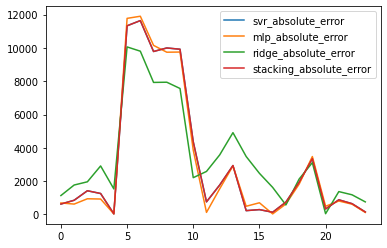

In [88]:
ax = svr_max_error.plot()

ax = mlp_max_error.plot(ax=ax)

ax = ridge_max_error.plot(ax=ax)

plot = stacking_max_error.plot(ax=ax)

fig = plot.get_figure()
fig.savefig("graficos/absolute_error_all_models_2018-04-04.png", facecolor='white', edgecolor='white')

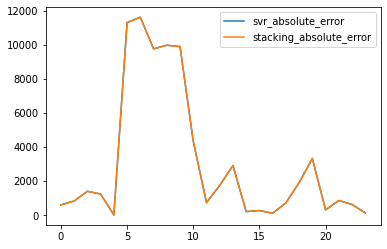

In [84]:
ax = svr_max_error.plot()

plot = stacking_max_error.plot(ax=ax)

fig = plot.get_figure()
fig.savefig("graficos/absolute_error_svr_stacking_2018-04-04.png", facecolor='white', edgecolor='white')

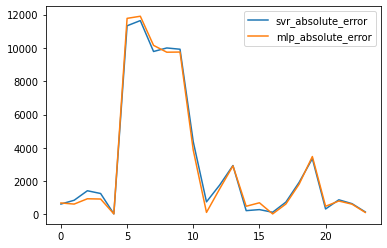

In [85]:
ax = svr_max_error.plot()

plot = mlp_max_error.plot(ax=ax)

fig = plot.get_figure()
fig.savefig("graficos/absolute_error_svr_mlp_2018-04-04.png", facecolor='white', edgecolor='white')

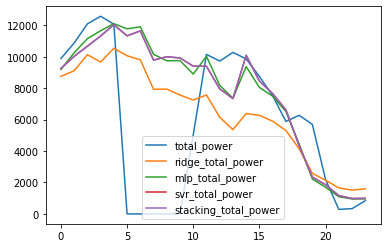

In [90]:
ax = Y_test_max_error.plot()

ax = ridge_pred_max_error.plot(ax=ax)
ax = mlp_pred_max_error.plot(ax=ax)
ax = svr_pred_max_error.plot(ax=ax)

plot = stacking_pred_max_error.plot(ax=ax)
fig = plot.get_figure()
fig.savefig("graficos/prediction_all_models_2018-04-04.png", facecolor='white', edgecolor='white')

In [ ]:


ax = Y_test_max_error.plot()

ax = ridge_pred_max_error.plot(ax=ax)
ax = mlp_pred_max_error.plot(ax=ax)
ax = svr_pred_max_error.plot(ax=ax)

plot = stacking_pred_max_error.plot(ax=ax)

fig = plot.get_figure()
fig.savefig("graficos/prediction_all_models_2018-04-04.png", facecolor='white', edgecolor='white')

0.08660358898676064


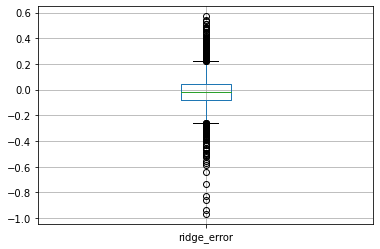

In [8]:
ridge_Y_test_predict = pd.DataFrame(pd.read_csv('graficos/ridge_Y_test_predict.csv'))

ridge_Y_test_predict.columns = ['total_power']


print(mean_absolute_error(Y_test, ridge_Y_test_predict)/17560)

ridge_error = pd.DataFrame((Y_test - ridge_Y_test_predict)/17560)
ridge_error.columns = ['ridge_error']

plot = ridge_error.boxplot()

fig = plot.get_figure()
#fig.savefig("graficos/ridge_error_boxplot.png", facecolor='white', edgecolor='white')

0.0661614823881312


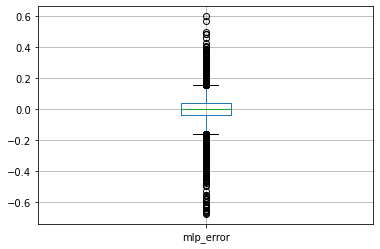

In [10]:
mlp_Y_test_predict = pd.DataFrame(pd.read_csv('graficos/mlp_Y_test_predict.csv'))

mlp_Y_test_predict.columns = ['total_power']


print(mean_absolute_error(Y_test, mlp_Y_test_predict)/17560)

mlp_error = pd.DataFrame((Y_test - mlp_Y_test_predict)/17560)
mlp_error.columns = ['mlp_error']

plot = mlp_error.boxplot()

fig = plot.get_figure()
fig.savefig("graficos/mlp_error_boxplot.png", facecolor='white', edgecolor='white')

0.06357119776892593


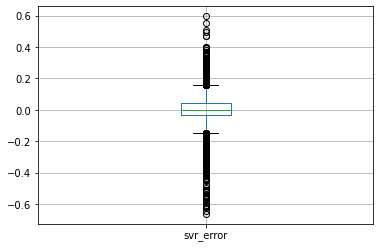

In [11]:
svr_Y_test_predict = pd.DataFrame(pd.read_csv('graficos/svr_Y_test_predict.csv'))

svr_Y_test_predict.columns = ['total_power']


print(mean_absolute_error(Y_test, svr_Y_test_predict)/17560)

svr_error = pd.DataFrame((Y_test - svr_Y_test_predict)/17560)
svr_error.columns = ['svr_error']

plot = svr_error.boxplot()

fig = plot.get_figure()
fig.savefig("graficos/svr_error_boxplot.png", facecolor='white', edgecolor='white')

0.06357119776892593


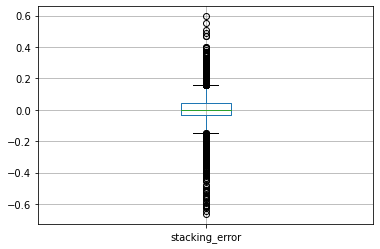

In [12]:
stacking_Y_test_predict = pd.DataFrame(pd.read_csv('graficos/stacking_Y_test_predict.csv'))

stacking_Y_test_predict.columns = ['total_power']


print(mean_absolute_error(Y_test, stacking_Y_test_predict)/17560)

stacking_error = pd.DataFrame((Y_test - stacking_Y_test_predict)/17560)
stacking_error.columns = ['stacking_error']

plot = stacking_error.boxplot()

fig = plot.get_figure()
fig.savefig("graficos/stacking_error_boxplot.png", facecolor='white', edgecolor='white')

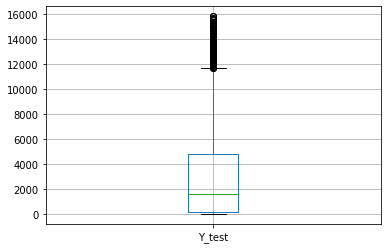

In [14]:
Y_test = pd.DataFrame(Y_test)
Y_test.columns = ['Y_test']

plot = Y_test.boxplot()

fig = plot.get_figure()
fig.savefig("graficos/Y_test_boxplot.png", facecolor='white', edgecolor='white')